In [1]:
# Install kaggle to colab
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nerthigabalakrishnan","key":"31a52dcb2427706b8f2f9ae79b854ad6"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c 'digit-recognizer'

 55% 5.00M/9.16M [00:00<00:00, 27.9MB/s]
100% 9.16M/9.16M [00:00<00:00, 36.1MB/s]
 82% 5.00M/6.09M [00:00<00:00, 25.3MB/s]
100% 6.09M/6.09M [00:00<00:00, 29.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 208MB/s]


In [5]:
!unzip /content/train.csv.zip
!unzip /content/test.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               
Archive:  /content/test.csv.zip
  inflating: test.csv                


In [6]:
def show_images(img_batch, label_batch):
    
    plt.imshow(img_batch)
    
    plt.axis('off')

    # Show 4 images in a row from the batch passed by args
  
        
        

In [7]:
import pandas as pd

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [8]:
len(train)

42000

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

In [10]:
label_df = train['label']
mod_train = train.drop(columns= 'label')
data_values = mod_train.values
test_data_values = test.values


In [11]:
X = train.drop(["label"],axis = 1).values
Y = train["label"].values
# Encoding the labels
Y.shape
X.shape

(42000, 784)

In [12]:
X.shape[0]

42000

In [13]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, 
                                                 test_size=1000, random_state=123, 
                                                 stratify=Y)
#train.drop('label',axis = 1)
#X_train, X_test = X_train.to_numpy(), X_test.to_numpy()

In [14]:
X_train.shape
y_train.shape

(41000,)

In [15]:
batch_size =32
IMG_SHAPE = 28

In [16]:
#reshaping is done bcoz we making sure we giving a model right shape 
x_train = np.array(X_train).reshape(-1,28,28,1)
x_train.shape

(41000, 28, 28, 1)

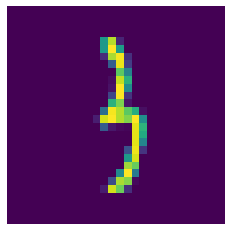

In [17]:
show_images(x_train[16][:,:,0],y_train[1])

In [18]:
#this normilazation and creating new images using zoom and scal
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split=0.2
)
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, subset='training')
validation_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size,subset='validation')

In [19]:
model = tf.keras.models.Sequential([
  #use your claasifier model with dropout and batchnormalization and maxpooling2d                                  
tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Conv2D(64,(3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.4),

#flattening the layers
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
#done with flattening
tf.keras.layers.Dense(10, activation='Softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          2

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [22]:
BATCH_SIZE=32   

history=model.fit(train_generator, validation_data = validation_generator,epochs=20, callbacks=[early_stopping])

Epoch 1/20
1025/1025 [==============================] - 75s 72ms/step - loss: 0.4408 - accuracy: 0.8563 - val_loss: 0.1276 - val_accuracy: 0.9580
Epoch 2/20
1025/1025 [==============================] - 71s 69ms/step - loss: 0.2003 - accuracy: 0.9396 - val_loss: 0.1013 - val_accuracy: 0.9691
Epoch 3/20
1025/1025 [==============================] - 71s 69ms/step - loss: 0.1597 - accuracy: 0.9539 - val_loss: 0.0757 - val_accuracy: 0.9778
Epoch 4/20
1025/1025 [==============================] - 71s 70ms/step - loss: 0.1427 - accuracy: 0.9577 - val_loss: 0.0923 - val_accuracy: 0.9745
Epoch 5/20
1025/1025 [==============================] - 72s 70ms/step - loss: 0.1301 - accuracy: 0.9617 - val_loss: 0.0738 - val_accuracy: 0.9799
Epoch 6/20
1025/1025 [==============================] - 72s 70ms/step - loss: 0.1225 - accuracy: 0.9638 - val_loss: 0.0664 - val_accuracy: 0.9806
Epoch 7/20
1025/1025 [==============================] - 71s 69ms/step - loss: 0.1124 - accuracy: 0.9657 - val_loss: 0.0645 -

In [23]:
def acc_loss_plot():
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['train', 'validation'], loc='lower right')
    ax[0].grid()
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'validation'], loc='upper right')
    ax[1].grid()
    plt.show()


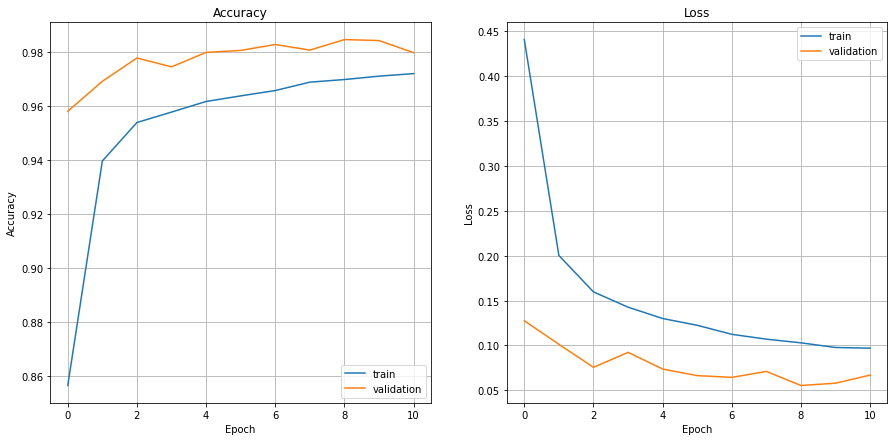

In [24]:
acc_loss_plot()

In [25]:
test = np.array(X_test).reshape(-1, 28, 28 , 1) / 255
len(test)

1000

In [26]:
import math
num_test_examples=len(test)

In [27]:
test_loss, test_accuracy = model.evaluate(test,y_test)
print('Accuracy on test dataset:', test_accuracy)

32/32 [==============================] - 1s 16ms/step - loss: 0.0295 - accuracy: 0.9930
Accuracy on test dataset: 0.9929999709129333


In [28]:
y_test.shape

(1000,)

In [29]:
predictions = model.predict(test)
prediction_classes = np.argmax(predictions, axis=1)

In [ ]:
output = pd.DataFrame({"ImageId": sample_submission.ImageId, "label": prediction_classes})
output.to_csv("My_submission", index=False)
output.head()